# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import pyabf
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from scipy.fft import fft, fftfreq, fftshift
from scipy import signal

In [2]:
tf.__version__

'2.3.1'

# Extracting all .abf files and Splitting data into dependent and independent variables

In [3]:
X = []
y = []
split = 12000
sizes = os.listdir('./data')

# for reading all the abf in the directory
for size in sizes:
    files = os.listdir('./data/' + str(size))
    for file in files:
        abf = pyabf.ABF('./data/' + str(size) + '/' + str(file))
        
# tidying up the data
        abf.setSweep(0)
        current = abf.sweepY
        current = -current
        
        for n in range(0,len(current)):
            if n%split == 0:
                X.append(current[n:n+split])
                y.append(size)
                

#  converting the data into a numpy array
print(X[0],y[0])

[-16044.312 -16042.48  -16041.26  ... -16044.312 -16043.091 -16043.091] 20


In [4]:
print(len(X), len(X[0]))

10000 12000


# Normalize X data

In [5]:
X = tf.keras.utils.normalize(X)

# Fast Fourier Transform

In [6]:
Xf = []
for n in range(0,len(X)):
    yf = abs(fft(X[n]))[1:]
    yf = yf/max(yf)
    Xf.append(yf)
Xf = np.array(Xf)

In [7]:
Xf[0]

array([1.    , 0.6244, 0.246 , ..., 0.246 , 0.6244, 1.    ], dtype=float32)

# onehot encoding for Y

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 1 1 1]


# Cutting up the data into shorter sequences

# Train test split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xf, y, test_size = 0.2, random_state = 0)

In [10]:
X_train, y_train

(array([[1.    , 0.2455, 0.4595, ..., 0.4595, 0.2455, 1.    ],
        [0.6041, 0.3673, 0.5281, ..., 0.5281, 0.3673, 0.6041],
        [0.671 , 0.6956, 1.    , ..., 1.    , 0.6956, 0.671 ],
        ...,
        [0.7968, 1.    , 0.324 , ..., 0.324 , 1.    , 0.7968],
        [1.    , 0.2039, 0.4072, ..., 0.4072, 0.2039, 1.    ],
        [0.6946, 0.2397, 1.    , ..., 1.    , 0.2397, 0.6946]],
       dtype=float32),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64))

In [11]:
for each in X_train[0][0:100]:
    print(each)

1.0
0.24551928
0.4595388
0.41102827
0.32571328
0.3950093
0.36437467
0.013496443
0.08383642
0.016180752
0.31811342
0.13682145
0.20349728
0.12491481
0.43343002
0.16614735
0.384739
0.24435309
0.288356
0.06819929
0.15660314
0.2317994
0.15944658
0.33705336
0.30454996
0.048705034
0.09311523
0.3314238
0.14407063
0.3953664
0.03452939
0.21827665
0.29026943
0.21386881
0.21902098
0.14883287
0.15101288
0.09224841
0.11647784
0.18534435
0.13834961
0.17324595
0.1087646
0.24985605
0.1268689
0.20881705
0.09933431
0.25800574
0.16828221
0.12272381
0.15485597
0.18049023
0.089468
0.0036498746
0.18734568
0.2507859
0.10065462
0.11567378
0.32800016
0.075448915
0.13396227
0.12778655
0.06637885
0.15237987
0.2195933
0.12688878
0.17775433
0.27987215
0.19172518
0.20337899
0.32310495
0.4172409
0.15981087
0.10215286
0.15979563
0.0955199
0.14441381
0.25493526
0.30340603
0.20588352
0.11911898
0.12817666
0.26627544
0.19174238
0.20149754
0.18343267
0.15495417
0.067897335
0.16628736
0.28461978
0.12463992
0.02398799
0.102

In [12]:
X_test, y_test

(array([[0.6722, 0.8301, 0.5675, ..., 0.5675, 0.8301, 0.6722],
        [1.    , 0.5696, 0.5246, ..., 0.5246, 0.5696, 1.    ],
        [0.8654, 0.5743, 0.3042, ..., 0.3042, 0.5743, 0.8654],
        ...,
        [0.9055, 0.3296, 0.5044, ..., 0.5044, 0.3296, 0.9055],
        [0.6374, 0.4693, 1.    , ..., 1.    , 0.4693, 0.6374],
        [1.    , 0.2094, 0.8381, ..., 0.8381, 0.2094, 1.    ]],
       dtype=float32),
 array([1, 0, 0, ..., 1, 0, 1], dtype=int64))

# Converting to Multivariate
The input to the convolutional network must be 3D, therefore the it has to be reshaped into a 3-dimensional array

In [13]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [14]:
X_train[0][0][0]

1.0

# Shuffling and the preprocessed data

In [15]:
# shuffling
idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train = y_train[idx]
print(idx)

[1224 4608 4388 ... 5776 4375 1326]


In [16]:
X_train, y_train, X_train.shape

(array([[[1.    ],
         [0.6951],
         [0.782 ],
         ...,
         [0.782 ],
         [0.6951],
         [1.    ]],
 
        [[0.4783],
         [0.8209],
         [1.    ],
         ...,
         [1.    ],
         [0.8209],
         [0.4783]],
 
        [[0.333 ],
         [1.    ],
         [0.9693],
         ...,
         [0.9693],
         [1.    ],
         [0.333 ]],
 
        ...,
 
        [[0.1741],
         [0.1448],
         [0.5387],
         ...,
         [0.5387],
         [0.1448],
         [0.1741]],
 
        [[0.8127],
         [0.3758],
         [0.129 ],
         ...,
         [0.129 ],
         [0.3758],
         [0.8127]],
 
        [[1.    ],
         [0.4749],
         [0.9038],
         ...,
         [0.9038],
         [0.4749],
         [1.    ]]], dtype=float32),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 (8000, 11999, 1))

In [17]:
X_test, y_test, X_test.shape

(array([[[0.6722],
         [0.8301],
         [0.5675],
         ...,
         [0.5675],
         [0.8301],
         [0.6722]],
 
        [[1.    ],
         [0.5696],
         [0.5246],
         ...,
         [0.5246],
         [0.5696],
         [1.    ]],
 
        [[0.8654],
         [0.5743],
         [0.3042],
         ...,
         [0.3042],
         [0.5743],
         [0.8654]],
 
        ...,
 
        [[0.9055],
         [0.3296],
         [0.5044],
         ...,
         [0.5044],
         [0.3296],
         [0.9055]],
 
        [[0.6374],
         [0.4693],
         [1.    ],
         ...,
         [1.    ],
         [0.4693],
         [0.6374]],
 
        [[1.    ],
         [0.2094],
         [0.8381],
         ...,
         [0.8381],
         [0.2094],
         [1.    ]]], dtype=float32),
 array([1, 0, 0, ..., 1, 0, 1], dtype=int64),
 (2000, 11999, 1))

# End of Preprocessing

# Building the CNN

In [18]:
from tensorflow import keras

# input shape
input_shape=(X_train.shape[1], 1)

# build network topology
model = keras.Sequential()

# 1st conv layer
model.add(keras.layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
model.add(keras.layers.MaxPooling1D(3, strides=2, padding='same'))
model.add(keras.layers.BatchNormalization())

# 2nd conv layer
model.add(keras.layers.Conv1D(32, 3, activation='relu'))
model.add(keras.layers.MaxPooling1D(3, strides=2, padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.1))


# 3rd conv layer
model.add(keras.layers.Conv1D(32, 2, activation='relu'))
model.add(keras.layers.MaxPooling1D(2, strides=2, padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.1))


# flatten output and feed it into dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

# output layer
# specifing the number of outputs and the activation function
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 11997, 32)         128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5999, 32)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 5999, 32)          128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5997, 32)          3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2999, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2999, 32)          128       
_________________________________________________________________
dropout (Dropout)            (None, 2999, 32)          0

In [21]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
250/250 [==============================] - 164s 657ms/step - loss: 0.9048 - accuracy: 0.6154
Epoch 2/30
250/250 [==============================] - 165s 660ms/step - loss: 0.5840 - accuracy: 0.6425
Epoch 3/30
250/250 [==============================] - 164s 656ms/step - loss: 0.5886 - accuracy: 0.6352
Epoch 4/30
250/250 [==============================] - 164s 656ms/step - loss: 0.5750 - accuracy: 0.6392
Epoch 5/30
250/250 [==============================] - 169s 675ms/step - loss: 0.5652 - accuracy: 0.6369
Epoch 6/30
250/250 [==============================] - 168s 671ms/step - loss: 0.5798 - accuracy: 0.5851
Epoch 7/30
250/250 [==============================] - 165s 660ms/step - loss: 0.4416 - accuracy: 0.7236
Epoch 8/30
250/250 [==============================] - 165s 660ms/step - loss: 0.3449 - accuracy: 0.8126
Epoch 9/30
250/250 [==============================] - 164s 654ms/step - loss: 0.2372 - accuracy: 0.8266
Epoch 10/30
250/250 [==============================] - 165s 660m

In [22]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred[0]

array([ True])

In [23]:
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [24]:
y_test

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[962  26]
 [ 20 992]]


0.977

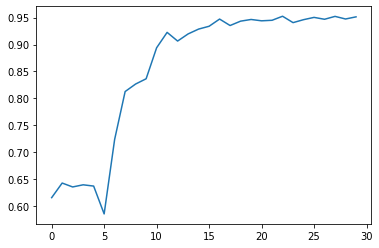

In [31]:
plt.plot(history.history['accuracy'])